<a href="https://colab.research.google.com/github/andreidore/aicrowd_blitz_may_2020/blob/master/minileaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb


     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 112kB 19.5MB/s 
     |████████████████████████████████| 460kB 17.0MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=c4074299197bc0ef2ec4008aed78dd90308e1684fb5d6328e12ccc2d0848da20
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=d81f1f8e49c0ecf27807ac38022e31bd673fef8df76cd30c2093166de7eb92e6
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=570d

In [2]:
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/test-images.npy
!wget https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/all_classes.txt

--2020-05-09 10:28:26--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-images.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.11, 130.117.252.16, 130.117.252.12, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133527680 (127M) [binary/octet-stream]
Saving to: ‘train-images.npy’

train-images.npy    100%[===================>] 127.34M  12.7MB/s    in 12s     

2020-05-09 10:28:39 (10.9 MB/s) - ‘train-images.npy’ saved [133527680/133527680]

--2020-05-09 10:28:40--  https://s3.eu-central-1.wasabisys.com/aicrowd-practice-challenges/public/minileaves/v0.1/train-labels.npy
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.11, 130.117.252.16, 130.117.252.12, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.25

In [0]:
from collections import Counter
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import wandb

## Import data

In [0]:
train_images_path = "train-images.npy" #path where data is stored
train_labels_path = "train-labels.npy"

train_images = np.load(train_images_path)
train_labels = np.load(train_labels_path)

# Load Class mapping
class_names = [x.strip() for x in open("all_classes.txt").readlines()]

In [10]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0:10])
print(class_names)


(43466, 32, 32, 3)
(43466,)
[ 7  4  9 29 20 15 37  5 29 28]
['apple-apple-scab', 'apple-black-rot', 'apple-cedar-apple-rust', 'apple-healthy', 'blueberry-healthy', 'cherry-including-sour-healthy', 'cherry-including-sour-powdery-mildew', 'corn-maize-cercospora-leaf-spot-gray-leaf-spot', 'corn-maize-common-rust', 'corn-maize-healthy', 'corn-maize-northern-leaf-blight', 'grape-black-rot', 'grape-esca-black-measles', 'grape-healthy', 'grape-leaf-blight-isariopsis-leaf-spot', 'orange-haunglongbing-citrus-greening', 'peach-bacterial-spot', 'peach-healthy', 'pepper-bell-bacterial-spot', 'pepper-bell-healthy', 'potato-early-blight', 'potato-healthy', 'potato-late-blight', 'raspberry-healthy', 'soybean-healthy', 'squash-powdery-mildew', 'strawberry-healthy', 'strawberry-leaf-scorch', 'tomato-bacterial-spot', 'tomato-early-blight', 'tomato-healthy', 'tomato-late-blight', 'tomato-leaf-mold', 'tomato-septoria-leaf-spot', 'tomato-spider-mites-two-spotted-spider-mite', 'tomato-target-spot', 'tomato-

## Visualize date

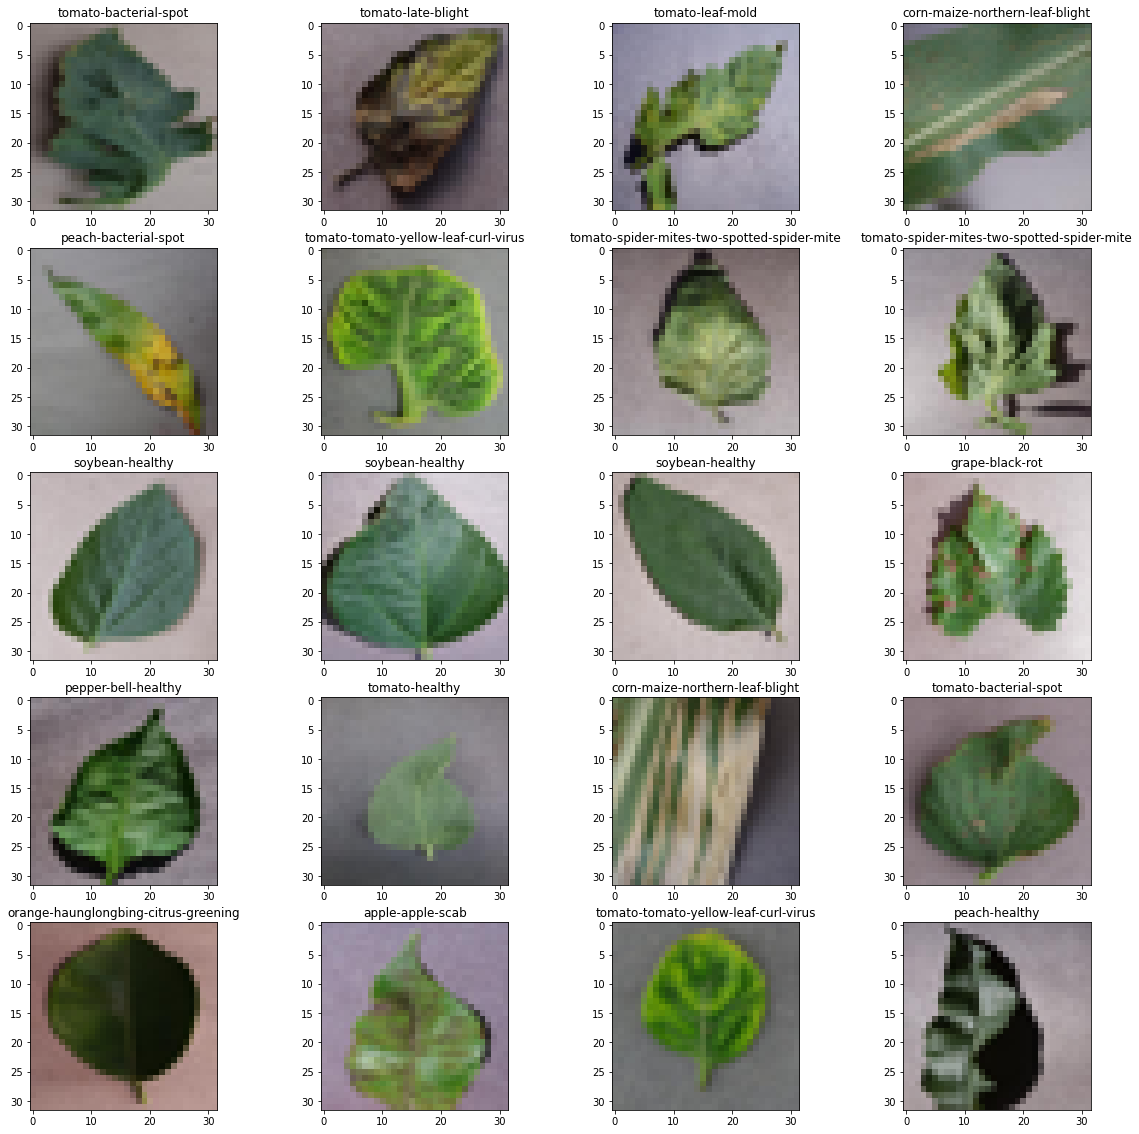

In [16]:
def random_data_sample():
    """
    Returns a random data sample from the training set
    """
    random_index = np.random.randint(0, train_images.shape[0])
    # Render the image
    image_array = train_images[random_index]
    class_label = train_labels[random_index] # an integral number in [0-38)
    class_name = class_names[class_label] # a human readable class name
    return image_array, class_label, class_name



fig=plt.figure(figsize=(20, 20))
w=10
h=10
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    image,class_label,class_name=random_data_sample()
    plt.imshow(image)
    plt.title(class_name)

## Distribution

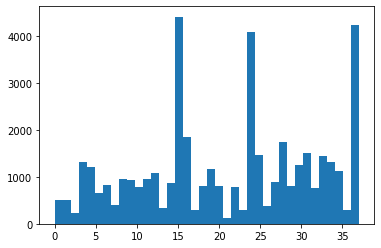

In [22]:
#data_counter = Counter(train_labels)
#unique_class_indices = data_counter.keys()

#for _class_index in unique_class_indices:
#    print("Class Index : ", _class_index)
#    print("Class Name : ", class_names[_class_index])
#    print("Number of images in the dataset : ", data_counter[_class_index])
#    print("="*100)



plt.hist(train_labels, bins = 38)
plt.show()
